# Base HR_comma_set - disponível em www.kaggle.com.br

Trata-se de uma base de RH contendo informações dos funcionários da empresa.
Nosso objetivo é prever a saída de funcionários, dessa forma iniciamos classificando as pessoas que saíram ou não da empresa ( as que permanecem são 0 e que saíram são 1).


In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [34]:
df = pd.read_csv('HR_comma_sep.csv')

In [35]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [37]:
df.drop('sales', axis = 1, inplace=True)
df.drop('salary', axis = 1, inplace=True)

In [38]:
#dividindo a base entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('left',axis=1),df['left'],test_size=0.3)

In [39]:
#verificando a forma dos dados 
X_train.shape,X_test.shape

((10499, 7), (4500, 7))

In [40]:
y_train.shape,y_test.shape

((10499,), (4500,))

In [60]:
clf = DecisionTreeClassifier()

In [61]:
clf = clf.fit(X_train,y_train)

In [27]:
clf.feature_importances_


array([4.98730652e-01, 1.47658979e-01, 1.08447617e-01, 9.53692942e-02,
       1.47882150e-01, 1.76291214e-03, 1.48395281e-04])

In [28]:
for feature,importancia in zip(df.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

satisfaction_level:0.4987306520415112
last_evaluation:0.14765897901444539
number_project:0.10844761730981689
average_montly_hours:0.09536929420515008
time_spend_company:0.14788215000551344
Work_accident:0.001762912142387127
left:0.00014839528117577714


In [29]:
resultado = clf.predict(X_test)
resultado


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3463
           1       0.96      0.97      0.96      1037

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



'pip3' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.
'pip3' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


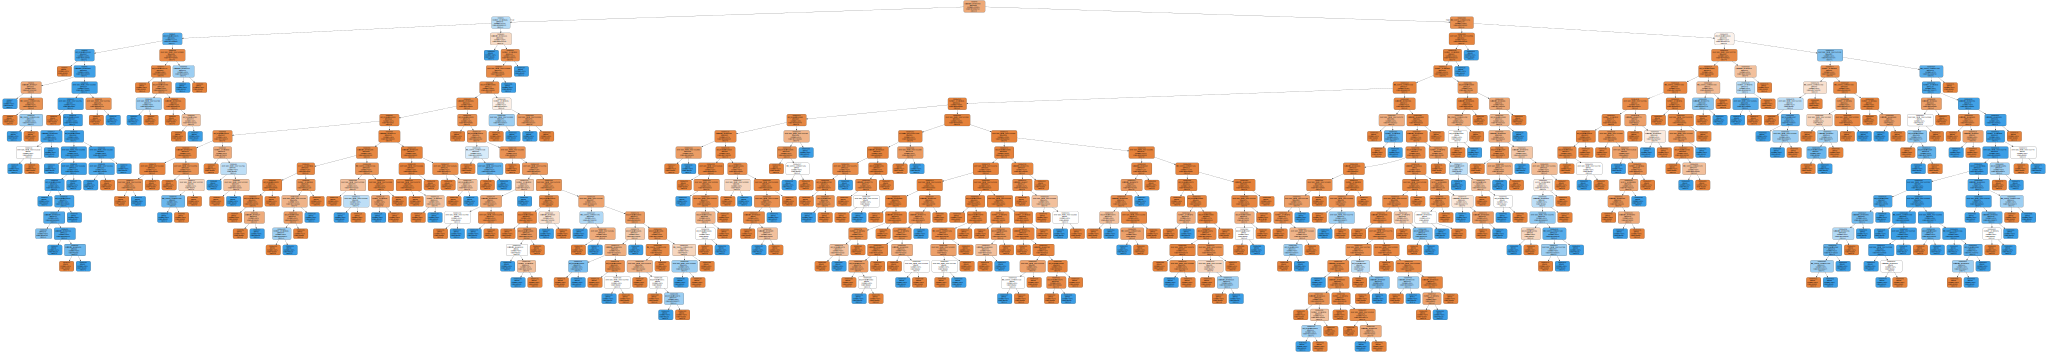

In [31]:
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot
import graphviz


dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=df.drop('left',axis=1).columns,
         class_names=['0','1'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [66]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = df.drop('left',axis=1),df['left']

# feature labels
features_label = df.drop('left',axis=1).columns

# class label
class_label = ['0','1']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…